<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/ml/my_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install --upgrade pycaret pandas-profiling==3.1.0

## 入力データの準備

In [2]:
from sklearn.datasets import fetch_openml

data, target = fetch_openml("mnist_784", version=1, return_X_y=True)
print(f"x_data.shape={data.shape}")
print(f"target.shape={target.shape}")

x_data.shape=(70000, 784)
target.shape=(70000,)


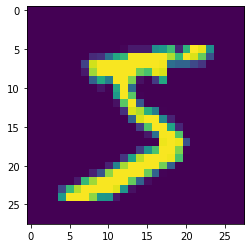

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x0_img = np.array([[data[0][row * 28 + col] for col in range(0, 28)] for row in range(0, 28)])
plt.imshow(x0_img)

In [4]:
import pandas as pd

columns = list([f"cell_{num:0>3d}" for num in range(0, 784)])
columns.append("label")
df = pd.DataFrame(np.hstack([data, np.array([target]).T]), 
                  columns=columns)
df

,cell_000,cell_001,cell_002,cell_003,cell_004,cell_005,cell_006,cell_007,cell_008,cell_009,...,cell_775,cell_776,cell_777,cell_778,cell_779,cell_780,cell_781,cell_782,cell_783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [5]:
from pycaret.classification import *

exp = setup(
    data=df, target="label", session_id=123,
    train_size=0.7, remove_perfect_collinearity=False,
    numeric_features=list([f"cell_{num:0>3d}" for num in range(0, 784)]),
    normalize=True, transformation=True)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(70000, 785)"
5,Missing Values,False
6,Numeric Features,784
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories="auto", sparse=False)

x_train = get_config('X_train').values
y_train = enc.fit_transform(np.array([[value] for value in get_config('y_train').values]))

x_test = get_config('X_test').values
y_test = enc.fit_transform(np.array([[value] for value in get_config('y_test').values]))

print(x_train.shape)
print(y_train[0])

(48999, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## レイヤの実装

シグモイド関数は
\begin{equation}
    σ(x)≡\frac{1}{1+e^{-x}}
\end{equation}
で定義される。その導関数は
\begin{equation}
    σ'(x)=\frac{e^{-x}}{(1+e^{-x})^2}=σ(1-σ)
\end{equation}
である。

シグモイドレイヤは入力$\vec{x}≡(x_0,x_1,…,x_{N_x})^T$に対する
出力$\vec{y}=(y_0,y_1,…,y_{N_y})^T$を
\begin{equation}
    \vec{y}=(y_0,…,y_{N_y})^T=(σ(x_0),…,σ(x_{N_x}))^T≡σ(\vec{x})
\end{equation}
と定める。
バッチ学習であれば$k$回目の入出力データを
それぞれ$\vec{x}^{(k)},\vec{y}^{(k)}$として
\begin{equation}
    Y≡(\vec{y}^{(0)},…,\vec{y}^{(N)})
    =(σ(\vec{x}^{(0)}),…,σ(\vec{x}^{(N)}))
    \equivσ(X)
\end{equation}
となる。

合成関数$L(\sigma(X))$の導関数は
\begin{equation}
    \frac{dL(σ(X))}{dx_i^{(k)}}
    =\sum_{l,j}\frac{∂L(σ(X))}{∂σ(x_j^{(l)})}
        \frac{{∂σ(x_j^{(l)})}}{∂x_i^{(k)}}
    =\frac{∂L(σ(X))}{∂σ(x_i^{(k)})}\sigma(x_i^{(k)})(1-\sigma(x_i^{(k)}))
\end{equation}
となって、これが逆伝搬の式である。

通常の学習であれば$x$はベクトルであり、
バッチ学習であれば$x$は行列である。
numpy.ndarray を使用して実装すれば、双方に対応できる。

In [7]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * self.out * (1.0 - self.out)
        return dx

バッチ学習のアファインレイヤは
\begin{equation}
  Y=(\vec{y}^{(0)},…,\vec{y}^{(N)})
  =W(\vec{x}^{(0)},…,\vec{x}^{(N)})+(\vec{b},…,\vec{b})
  =WX+(\vec{b},…,\vec{b})
\end{equation}
で定義される。

バッチ版の損失関数$L$の全微分は
\begin{align}
    &\frac{dL(Y(X;W,\vec{b}))}{dx_i^{(k)}}
    =\sum_{j,l}\frac{∂L}{∂y_j^{(l)}}\frac{∂y_j^{(l)}}{∂x_i^{(k)}}
    =\sum_{j,l}\frac{∂L}{∂y_j^{(l)}}δ^l_k W_{ji}
    =\sum_{j}\frac{∂L}{∂y_j^{(k)}}W_{ji} \\
    &\frac{dL(Y(X;W,\vec{b}))}{dW_{ij}}
    =\sum_{k,l}\frac{∂L}{∂y_k^{(l)}}\frac{∂y_k^{(l)}}{∂W_{ij}}
    =\sum_{k,l}\frac{∂L}{∂y_k^{(l)}}δ^k_i x_j^{(l)}
    =\sum_{l}\frac{∂L}{∂y_i^{(l)}}x_j^{(l)},\\
    &\frac{dL(Y(X;W,\vec{b}))}{db_i}
    =\sum_{k,l}\frac{∂L}{∂y_k^{(l)}}\frac{∂y_k^{(l)}}{∂b_i}
    =\sum_{k,l}\frac{∂L}{∂y_k^{(l)}}δ_i^k
    =\sum_{l}\frac{∂L}{∂y_i^{(l)}}
\end{align}
となる。
実装は numpy.dot() の特性と転置に気をつけて行う。

In [8]:
from dataclasses import dataclass

@dataclass
class Affine:
    w: np.ndarray
    b: np.ndarray
    x: np.ndarray = None
    dw: np.ndarray = None
    db: np.ndarray = None

    def forward(self, x: np.ndarray) -> np.ndarray:
        self.x = x
        out = np.dot(x, self.w) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

オーバーフロー対策済みのソフトマックス関数は
\begin{equation}
    y_k=\frac{\exp(a_k+C')}{\sum_{i=1}^n\exp(a_i+C')},\quad
    C'\equiv\max_k a_k
\end{equation}
アンダーフロー対策済みの交差エントロピーは
\begin{equation}
    E = -\sum_k t_k \log (y_k+δ),\quad|δ|≪1
\end{equation}
である。
バッチ学習での交差エントロピーはバッチに対する平均で定義する。

In [9]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / batch_size

@dataclass
class SoftmaxWithLoss:
    loss: np.ndarray = None
    y: np.ndarray = None
    t: np.ndarray = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

## ニューラルネットの作成

In [10]:
from collections import OrderedDict


class MyNet:

    def __init__(self):
        input_size = 784
        hidden_sizes = [50, 100]
        output_size = 10
        weight_init_std = 0.01

        # 重みの初期化
        self.params = {}

        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_sizes[0])
        self.params['b1'] = np.zeros(hidden_sizes[0])

        self.params['W2'] = weight_init_std * np.random.randn(hidden_sizes[0], hidden_sizes[1]) 
        self.params['b2'] = np.zeros(hidden_sizes[1])

        self.params['W3'] = weight_init_std * np.random.randn(hidden_sizes[1], output_size) 
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
               
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dw, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dw, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dw, self.layers['Affine3'].db

        return grads

In [11]:
network = MyNet()

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 勾配
    grad = network.gradient(x_batch, y_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09971632074123962 0.0947573925051188


In [12]:
print(train_loss_list)

[6.889948369168252, 6.885172211787551, 6.88420052506596, 6.892154150352622, 6.886149452399147, 6.888353121120843, 6.9316408878916125, 6.942163933307643, 6.910192860449821, 6.942333088104749, 6.8676245969029655, 6.902576189746058, 6.952521160468129, 7.000936471821729, 7.078410331187646, 7.124731292708423, 7.060747236341692, 7.105176724739774, 7.095163490942429, 6.9919953864884645, 7.2099471197705585, 7.207772867321963, 7.089313858337915, 7.180305296871637, 7.239006114247161, 7.227438225767337, 7.18330081845399, 7.283986332152093, 7.325103716009316, 7.643769320708696, 7.461634624725588, 7.521243787664676, 7.698356278732219, 8.040064542928626, 8.235398223123028, 8.020272040779258, 8.249929661199864, 8.078344431398223, 8.252579198559266, 8.273438803371686, 8.135577186383443, 8.499735665556763, 8.463954601573443, 8.545014106430301, 8.661682847064727, 8.530030076641003, 9.467377315382272, 9.230393512862076, 9.221429491118393, 9.43888147360682, 9.590927721383935, 9.229635807777898, 9.71121982